In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

<Axes: ylabel='Gender'>

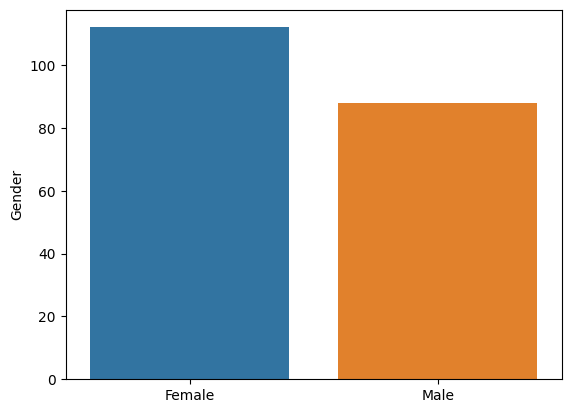

In [4]:
sns.barplot(x =df.Gender.value_counts().index,y =df.Gender.value_counts() )

<Axes: >

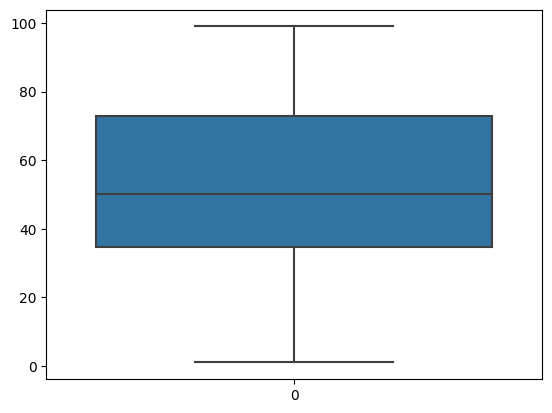

In [5]:
sns.boxplot(df.Spending_Score)

<Axes: >

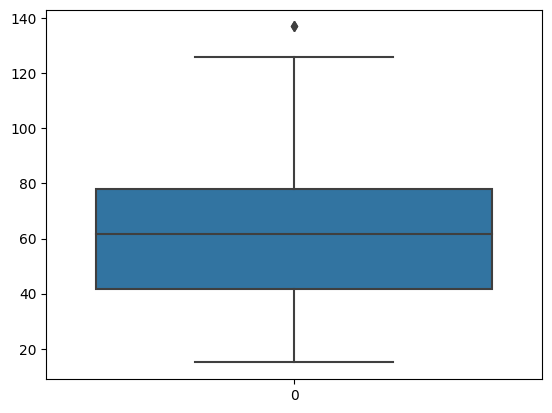

In [6]:
sns.boxplot(df.Annual_Income)

<Axes: >

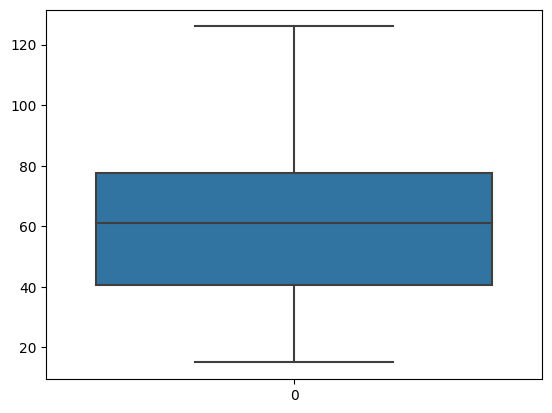

In [7]:
q3=df.Annual_Income.quantile(0.75)
q1=df.Annual_Income.quantile(0.25)
IRQ=q3-q1
upperlimit=q3+1.5*IRQ
lowerlimit=q1-1.5*IRQ
df = df[df.Annual_Income<upperlimit]
sns.boxplot(df.Annual_Income)

In [8]:
df.shape

(198, 5)

<Axes: >

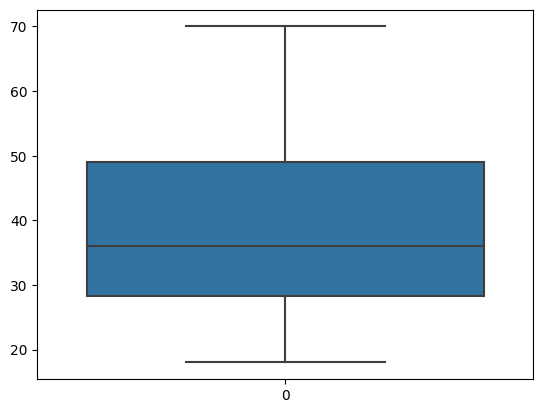

In [9]:
sns.boxplot(df.Age)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
new_df = df.iloc[:,:-1]
new_df.head()
from sklearn import cluster
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [12]:
error

[811076.2474747477,
 242961.37373737368,
 131632.83190254815,
 91432.6180999669,
 70600.86801226034,
 59867.40022106729,
 51146.099641379886,
 43056.22107961298,
 36774.045807469985,
 33075.174941579775]

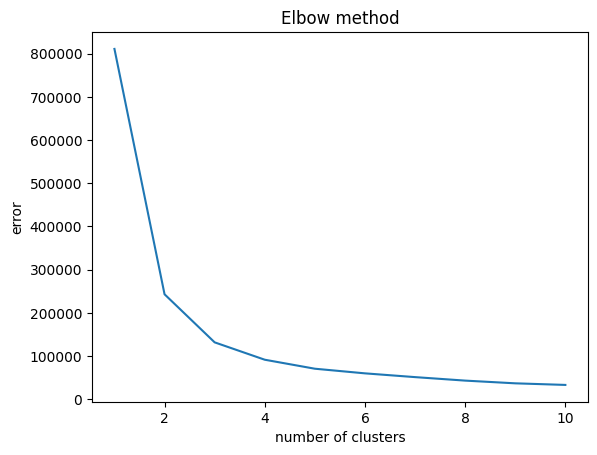

In [13]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()